<a id="3"></a>

# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Collection</p>


In [1]:
#Importing all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np 

import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,confusion_matrix,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import shapely
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
#Using 'read_excel' method as the file is in '.xlsx' format
data = pd.read_excel("S:/Data Science class/Datasets/Attrition.xlsx")

In [3]:
data.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe(include=object).T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


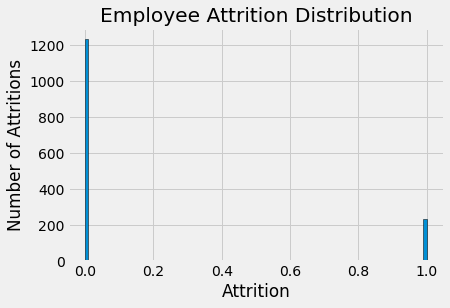

In [7]:
#plt.figsize(8, 8)

# Rename the score 
#df = df.rename(columns = {'Attrition': 'Employee Attrition'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['Attrition'],bins = 100, edgecolor = 'k');
plt.xlabel('Attrition'); plt.ylabel('Number of Attritions'); 
plt.title('Employee Attrition Distribution');

In [8]:
# To check number of missing values in each columns
data.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

<a id="3"></a>

# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis (EDA)</p>


In [10]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [11]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['#B9C0C9','yellow' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition', marker=dict(
        color='yellow',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.9, marker=dict(
        color='#B9C0C9',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.9, marker=dict(
        color='darkblue',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [12]:
def plot_pie(var_select) :
    
    colors = ['#B9C0C9', '#CED2FD', '#ceb0ff', 'lightskyblue', 'lightgrey', '#EAB9FC', 'cyan', '#DDC8FE']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), 
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employees attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

# Distribution of Attrition

In [13]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of attrition variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

# Gender Distribution of Employee Attrition

In [14]:
plot_pie('Gender')
barplot('Gender', False)

**Observation :**
As seen in the chart above, the attrition is maximum between for Male employees. The attrition is 63.3% for Male while 36.7 for Female employees.

# what is effect of age on attrition ?

<img src="https://www.kofax.com/-/media/images/library/images/people/as-320523277-scott-working-from-home-on-laptop/16x9_l.jpg" width="900" height="500" />

In [15]:
barplot('Age', False)

**Observation :**
As seen in the chart above, the attrition is maximum between the age groups 28-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21

# Is income the main factor towards employee attrition?

<img src="https://cdn.corporatefinanceinstitute.com/assets/cash-money.jpg" width="900" height="400" />

In [99]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

**Observation :** The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. Former employees had a median monthly income more than $2,000 less than current employees.


# Does the Department of work impact attrition?

<img src="https://www.incimages.com/uploaded_files/image/1920x1080/getty_528923038_200012602000928067_332884.jpg" width="900" height="500" />


In [17]:
plot_pie('Department') 
barplot('Department',True)

**Observations :** This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

# How does the environment satisfaction impact attrition?

![](https://ichef.bbci.co.uk/news/976/cpsprodpb/52FD/production/_112154212_coffee1.jpg)

In [18]:
sats_att=data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(sats_att,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level Counts of People in an Organization')

In [19]:
#plot_pie('EnvironmentSatisfaction')
barplot('EnvironmentSatisfaction',False)

**Observation :** In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

# How Is Attrition Affected by business travels?

<img src="https://media.cntraveler.com/photos/5c51f8a36dfd6a18f992875c/16:9/w_2560%2Cc_limit/Up%2520in%2520the%2520Air_MCDUPIN_EC009%2520(1).jpg" width="850" height="300" />

In [20]:
barplot('BusinessTravel', False)

**Observation :** Most employees who travel rarely don't leave the company. From the plot we can tell, sending employees on business travels or not doesn't really make much of a difference and doesn't have a significant effect on attrition. 
So the Business Travel is not one of the main factors causing attrition but who travel frequently have biggest percentage

# What is effect of the distance from home on attrition ?

In [21]:
barplot('DistanceFromHome', False)

**Observation :** Most of the people who leave the company are located more than 11-12 km away from the company

# How does self Job Satisfaction impact the Attrition?

In [22]:
jsats_att=data.groupby(['JobSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(jsats_att,x='JobSatisfaction',y='Counts',color='Attrition',title='Job Satisfaction level Counts of People in an Organization')

In [23]:
#plot_pie('JobSatisfaction')
barplot('JobSatisfaction',False)

**Observation :** With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Environment Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

# Does company stocks for employees impact attrition?

<img src="https://www.bankrate.com/2021/08/31093532/investing-what-is-a-stock-exchange-featured.jpg?auto=webp&optimize=high&crop=16:9" width="900" height="500" />

In [24]:
stock_att=data.groupby(['StockOptionLevel','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.bar(stock_att,x='StockOptionLevel',y='Counts',color='Attrition',title='Stock facilities level wise People in an Organization')

**Observation :** The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

# How does Work Life Balance impact the overall attrition rates?

<img src="https://cdn.papershift.com/20220317124734/work-life-balance-scaled.jpeg" width="900" height="500" />

In [25]:
barplot('WorkLifeBalance', False)

**Observation :** People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

# How does work experience affect attrition?

<img src="https://oneminuteenglish.org/wp-content/uploads/2021/02/Untitled-design-2021-02-08T172833.357-1536x864.png?ezimgfmt=ngcb1/notWebP" width="900" height="500" />

In [26]:
ncwrd_att=data.groupby(['NumCompaniesWorked','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.area(ncwrd_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

**Observations :** As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

# How does work duration in current role impact Attrition?

![](https://www.myhrtoolkit.com/hubfs/staff-overworking-burnout.jpg)

In [27]:
barplot('YearsInCurrentRole', False)

**Observation :** We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

# Does hike percentage impact Attrition?

<img src="https://images.cnbctv18.com/wp-content/uploads/2021/06/wage-salary-hike-1019x573.jpg" width="900" height="500" />

In [28]:
barplot('PercentSalaryHike', False)

**Observation :** Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

# Are managers a reason of people resigning ?

![](https://www.workitdaily.com/media-library/image.jpg?id=19296463&width=980)

In [29]:
px.box(data, x="YearsAtCompany")

**Observation :** Most employees remain in the company for 3-9 years with median being 5 years. Is it for the managers? Let's try to find out.

In [30]:
man_att=data.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(man_att,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization')

In [31]:
barplot('YearsWithCurrManager', False)

**Observation :** Employees have a tendancy to switch jobs during within first year. At an average span of 2  & 7 years they tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

<a id="4"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Engineering</p>

In [32]:
# Oversampling
# Separate majority and minority classes
df_majority = data[data.Attrition==0]
df_minority = data[data.Attrition==1]

#  We will Upsample minority class in order to remove the oversampling of the data

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1233,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the new class counts

df_upsampled.Attrition.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [33]:
df_upsampled.shape

(2466, 35)

In [34]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 1 to 1153
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 2466 non-null   int64 
 1   Age                       2466 non-null   int64 
 2   BusinessTravel            2466 non-null   object
 3   DailyRate                 2466 non-null   int64 
 4   Department                2466 non-null   object
 5   DistanceFromHome          2466 non-null   int64 
 6   Education                 2466 non-null   int64 
 7   EducationField            2466 non-null   object
 8   EmployeeCount             2466 non-null   int64 
 9   EmployeeNumber            2466 non-null   int64 
 10  EnvironmentSatisfaction   2466 non-null   int64 
 11  Gender                    2466 non-null   object
 12  HourlyRate                2466 non-null   int64 
 13  JobInvolvement            2466 non-null   int64 
 14  JobLevel                

In [35]:
df = df_upsampled

In [36]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,0,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,0,59,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


In [37]:
df.shape

(2466, 35)

In [38]:
df.isna().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

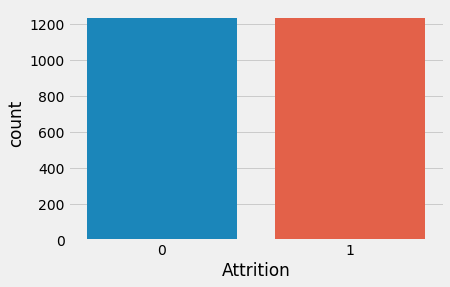

In [39]:
# We used countplot to visualize the number of attritions
# We done Oversampling on minority class i.e. 0.
sb.countplot(df['Attrition'])

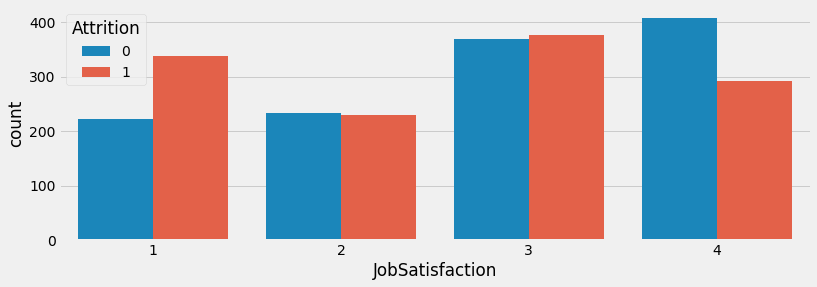

In [40]:
# To get the broader plot, we used subplots function with 'figsize' parameter
# Below graph shows the countplot of 'Age' with 'Attrition'
plt.subplots(figsize=(12,4))
sb.countplot(x='JobSatisfaction',hue='Attrition',data=df)
plt.ylabel = 'Attrition'
plt.title = 'JobSatisfaction vs Attrition'

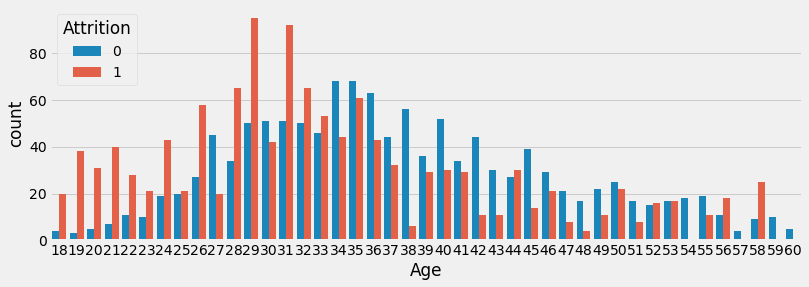

In [41]:
# To get the broader plot, we used subplots function with 'figsize' parameter
# Below graph shows the countplot of 'Age' with 'Attrition'
plt.subplots(figsize=(12,4))
sb.countplot(x='Age',hue='Attrition',data=df)
plt.ylabel = 'Attrition'
plt.title = 'Age vs Attrition'

In [42]:
# Dropping 'Over18', 'EmployeeNumber' & 'StandardHours' columns as they are irrelevant
df = df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1)

In [43]:
df_cat = df.loc[:,df.dtypes==np.object]
df_con = df.loc[:,df.dtypes!=np.object]

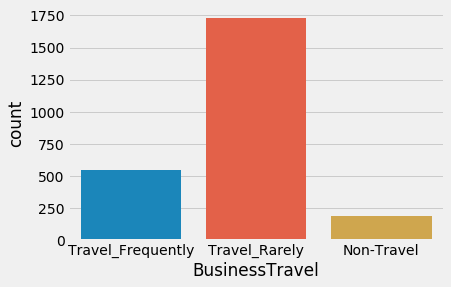

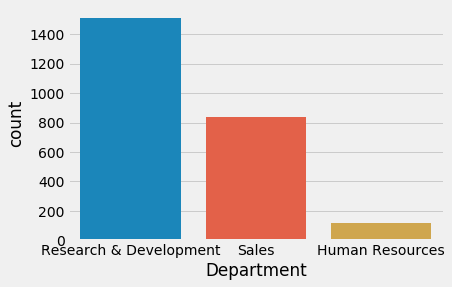

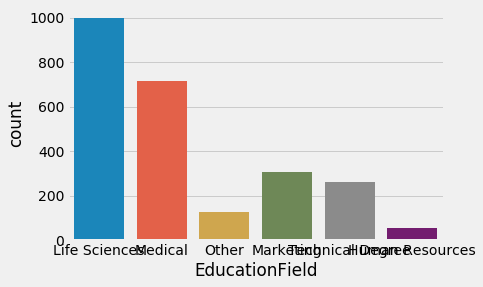

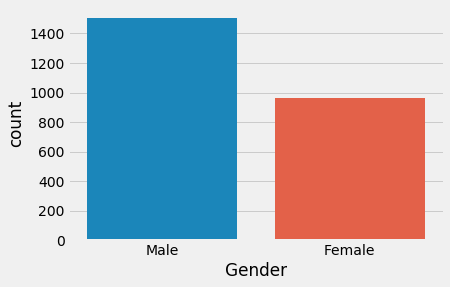

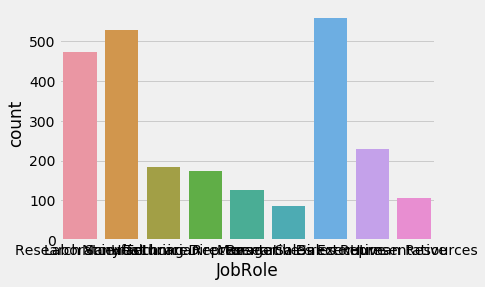

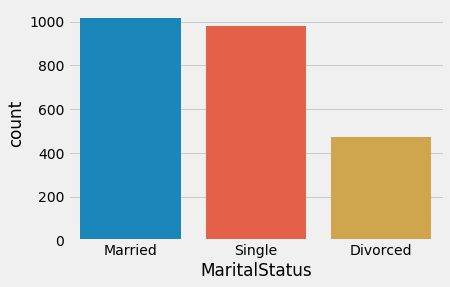

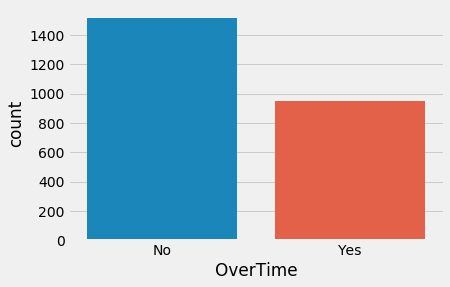

In [44]:
for i in df_cat.columns:
    sb.countplot(df_cat[i])
    plt.show()

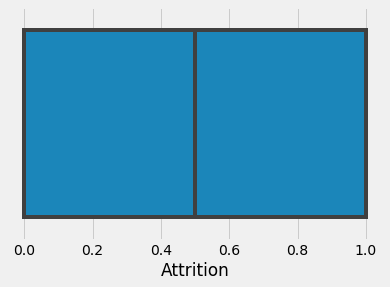

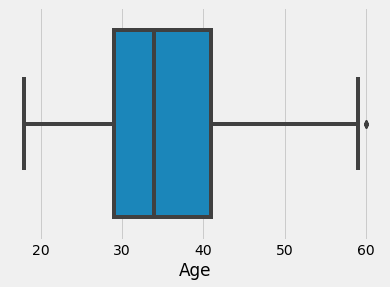

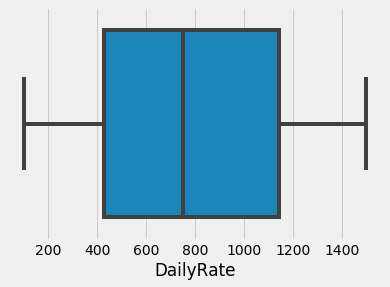

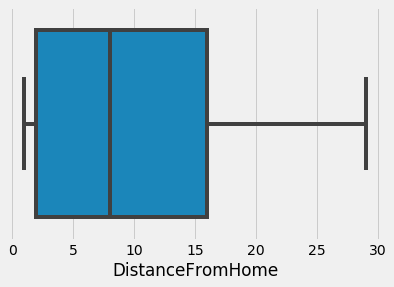

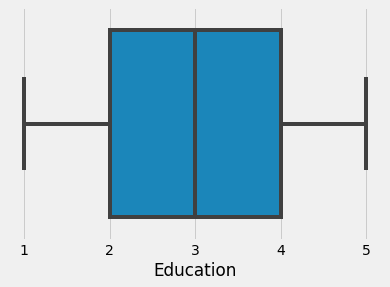

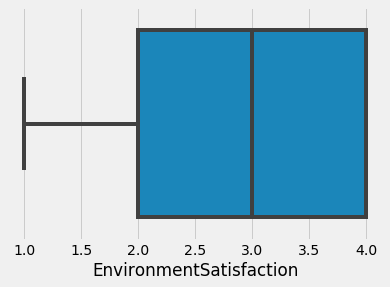

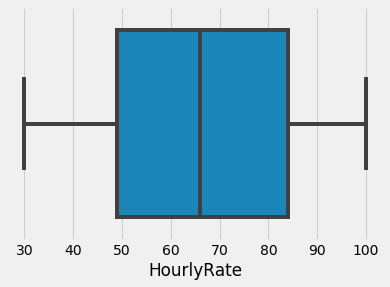

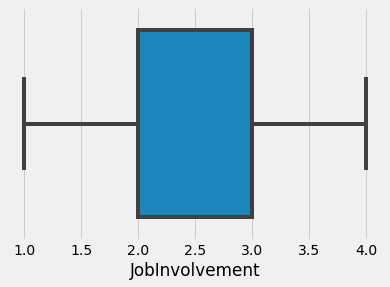

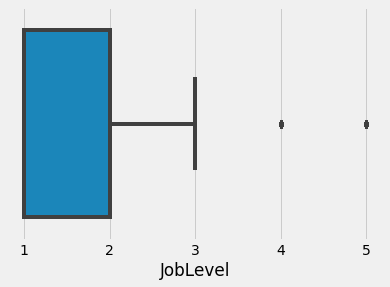

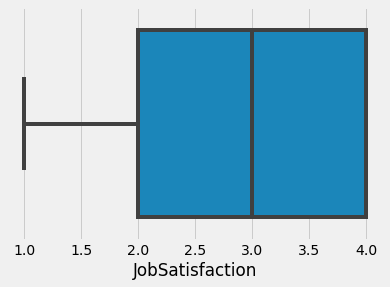

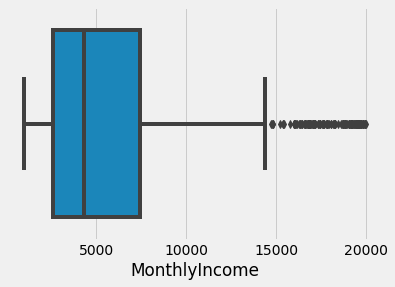

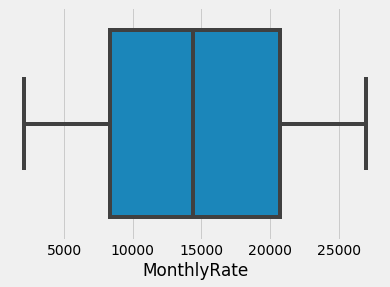

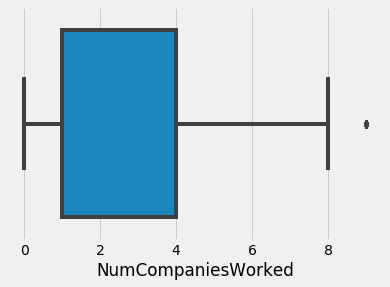

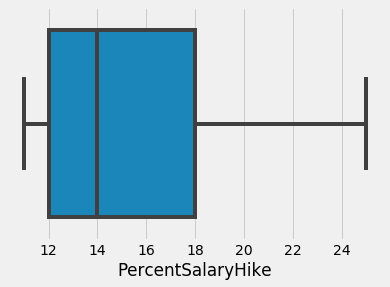

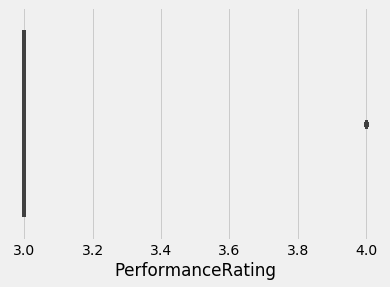

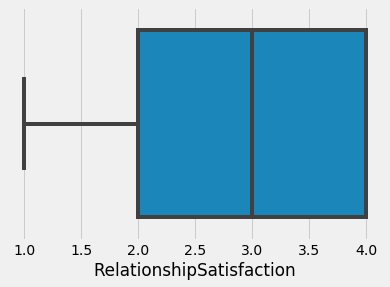

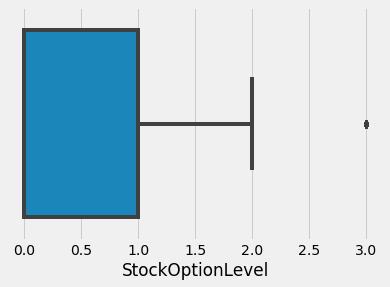

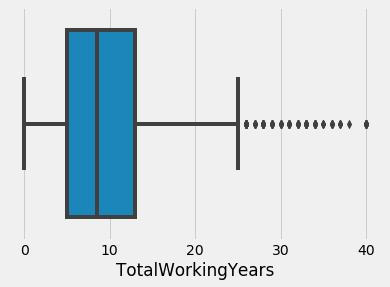

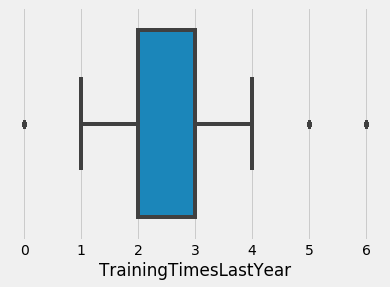

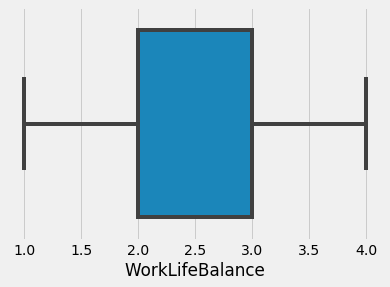

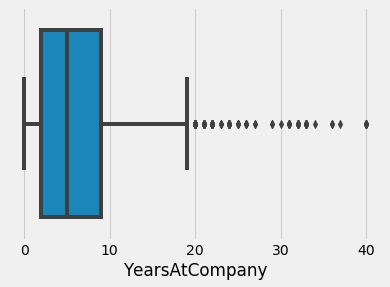

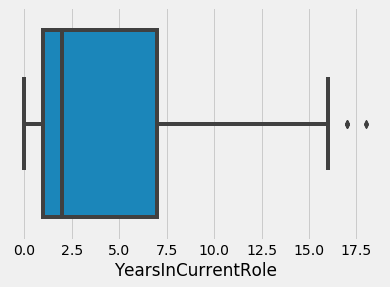

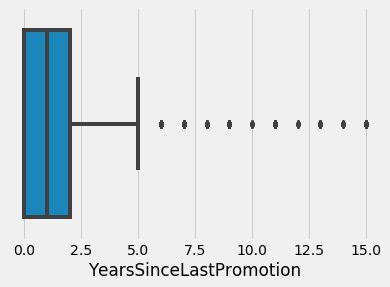

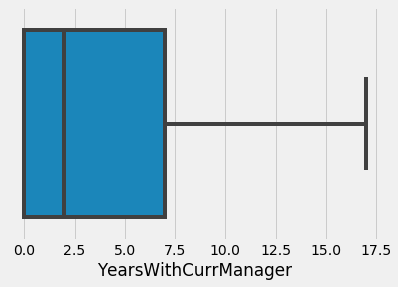

In [45]:
for i in df_con.columns:
    sb.boxplot(df_con[i])
    plt.show()

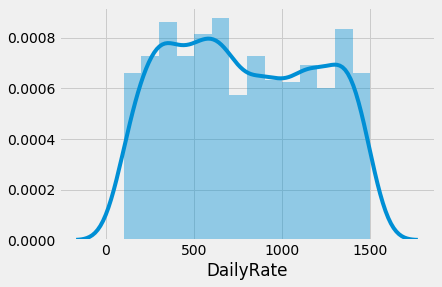

In [46]:
sb.distplot(df['DailyRate'])

In [47]:
# Find all correlations and sort 
correlations_data = df.corr()['Attrition'].sort_values()

print("****************************************")
print("Most negative correlations are as below -")
# Print the most negative correlations
print(correlations_data.head(15), '\n')

print("****************************************")
print("Most positive correlations are as below -")

# Print the most positive correlations
print(correlations_data.tail(15))

****************************************
Most negative correlations are as below -
TotalWorkingYears         -0.243382
YearsWithCurrManager      -0.230702
JobLevel                  -0.228875
MonthlyIncome             -0.222801
Age                       -0.220809
YearsInCurrentRole        -0.212466
StockOptionLevel          -0.183523
YearsAtCompany            -0.167755
JobInvolvement            -0.166477
EnvironmentSatisfaction   -0.137919
JobSatisfaction           -0.122939
WorkLifeBalance           -0.080523
DailyRate                 -0.071597
TrainingTimesLastYear     -0.066594
YearsSinceLastPromotion   -0.061535
Name: Attrition, dtype: float64 

****************************************
Most positive correlations are as below -
EnvironmentSatisfaction    -0.137919
JobSatisfaction            -0.122939
WorkLifeBalance            -0.080523
DailyRate                  -0.071597
TrainingTimesLastYear      -0.066594
YearsSinceLastPromotion    -0.061535
RelationshipSatisfaction   -0.057079
E

In [48]:
# To get overall brief idea about the 'categorical' columns

for column in df.columns:
    if df[column].dtypes=='object':
        print(str(column)+' : '+ str(df[column].unique()))
        print(df[column].value_counts())
        print('******************************************************')

BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Travel_Rarely        1730
Travel_Frequently     546
Non-Travel            190
Name: BusinessTravel, dtype: int64
******************************************************
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    1509
Sales                      840
Human Resources            117
Name: Department, dtype: int64
******************************************************
EducationField : ['Life Sciences' 'Medical' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       998
Medical             717
Marketing           309
Technical Degree    260
Other               126
Human Resources      56
Name: EducationField, dtype: int64
******************************************************
Gender : ['Male' 'Female']
Male      1504
Female     962
Name: Gender, dtype: int64
******************************************************
JobRole : ['Research Scientist' 'Laboratory

In [49]:
#We will check unique values in each columns

for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

Attrition: Number of unique values 2
Age: Number of unique values 43
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of unique values 2
RelationshipSatisfaction: Number of unique values 4
StockOptionLevel: Number of unique values 4
TotalWorkin

In [50]:
# To get the co-relation between every columns
df.corr()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,1.000000,-0.220809,-0.071597,0.098512,-0.022694,-0.137919,0.003675,-0.166477,-0.228875,-0.122939,...,0.020964,-0.057079,-0.183523,-0.243382,-0.066594,-0.080523,-0.167755,-0.212466,-0.061535,-0.230702
Age,-0.220809,1.000000,0.032100,0.019252,0.190891,0.014370,0.070996,0.070871,0.519747,0.047114,...,-0.024274,0.102903,0.101319,0.680500,-0.018614,-0.011880,0.393797,0.303579,0.256985,0.278703
DailyRate,-0.071597,0.032100,1.000000,-0.044873,-0.009899,0.004270,0.051334,0.056995,0.025278,-0.008526,...,-0.022848,-0.032806,0.008689,0.020165,0.011645,0.013361,-0.050843,0.005386,-0.052973,-0.017686
DistanceFromHome,0.098512,0.019252,-0.044873,1.000000,0.023134,0.002899,0.010398,0.065217,0.003312,-0.020054,...,0.059710,0.027981,0.025478,-0.013628,-0.059857,-0.049741,-0.031735,-0.031031,-0.000326,-0.029511
Education,-0.022694,0.190891,-0.009899,0.023134,1.000000,-0.041649,0.030560,0.063095,0.095979,-0.050579,...,-0.012832,0.026053,0.029820,0.159940,-0.033190,-0.047338,0.098376,0.069856,0.091283,0.090684
EnvironmentSatisfaction,-0.137919,0.014370,0.004270,0.002899,-0.041649,1.000000,-0.032580,0.022125,-0.006330,0.009566,...,-0.016987,0.005946,-0.029168,0.006906,0.027408,-0.015734,0.027399,0.035016,0.063622,0.012908
HourlyRate,0.003675,0.070996,0.051334,0.010398,0.030560,-0.032580,1.000000,0.055722,0.002073,-0.082227,...,-0.019599,-0.005012,-0.022987,0.028821,-0.000621,-0.036482,0.007605,-0.016426,-0.048944,-0.005257
JobInvolvement,-0.166477,0.070871,0.056995,0.065217,0.063095,0.022125,0.055722,1.000000,0.013870,-0.027858,...,-0.033390,0.042320,0.045885,0.020401,-0.050151,0.007700,-0.037669,-0.011430,-0.004989,0.027042
JobLevel,-0.228875,0.519747,0.025278,0.003312,0.095979,-0.006330,0.002073,0.013870,1.000000,0.041596,...,-0.079240,0.038613,0.065715,0.780003,-0.028013,0.045721,0.581238,0.470912,0.389616,0.438048
JobSatisfaction,-0.122939,0.047114,-0.008526,-0.020054,-0.050579,0.009566,-0.082227,-0.027858,0.041596,1.000000,...,-0.043934,0.049382,0.055233,0.016792,0.003005,-0.010762,0.071385,0.050219,0.052175,0.030394


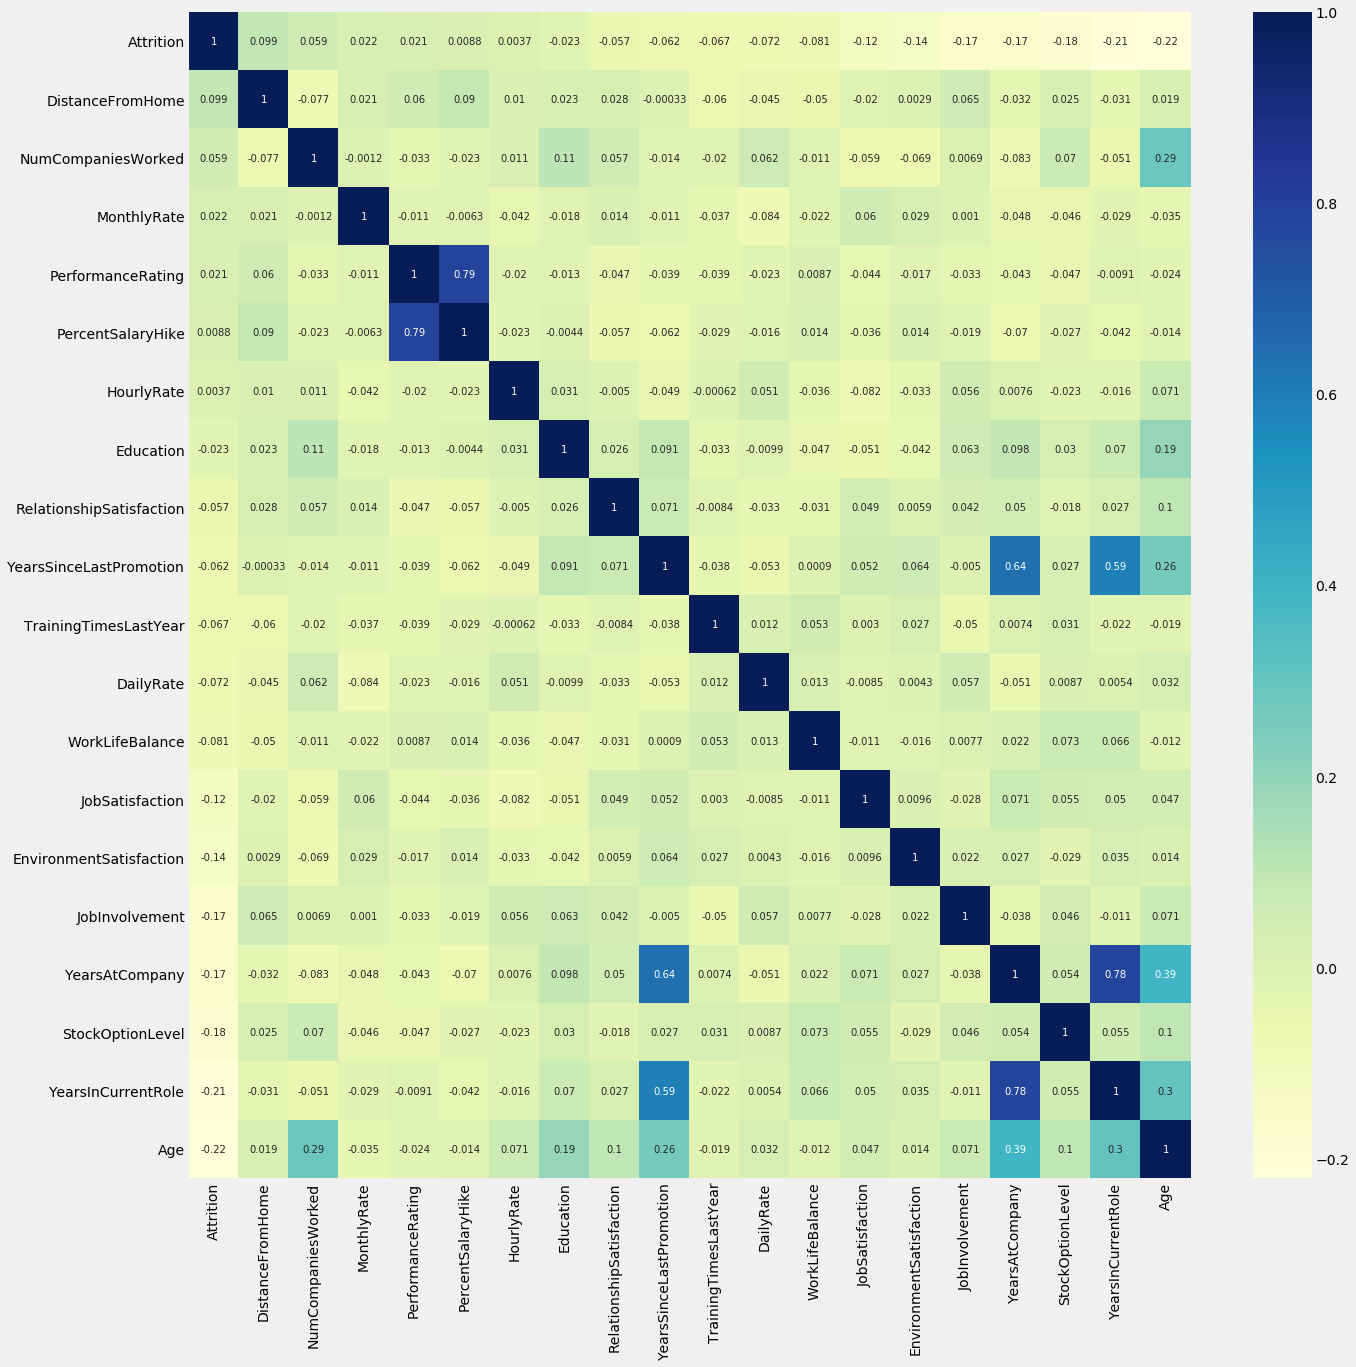

In [51]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(20, 20))
sb.heatmap(df[col].corr(), annot=True, cmap="YlGnBu", annot_kws={"size":10})
plt.savefig("Attrition_correlation.jpg")

In [52]:
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
5,Travel_Frequently,Research & Development,Life Sciences,Male,Laboratory Technician,Single,No
6,Travel_Rarely,Research & Development,Medical,Female,Laboratory Technician,Married,Yes


In [53]:
df_cat.isna().sum()

BusinessTravel    0
Department        0
EducationField    0
Gender            0
JobRole           0
MaritalStatus     0
OverTime          0
dtype: int64

In [54]:
df_con.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,0,49,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
3,0,33,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,0,27,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
5,0,32,1005,2,2,4,79,3,1,4,...,3,3,0,8,2,2,7,7,3,6
6,0,59,1324,3,3,3,81,4,1,1,...,4,1,3,12,3,2,1,0,0,0


In [55]:
df_con.isna().sum()

Attrition                   0
Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [56]:
le = LabelEncoder()
df_cat['BusinessTravel'] = le.fit_transform(df_cat['BusinessTravel'])
df_cat['Department'] = le.fit_transform(df_cat['Department'])
df_cat['EducationField'] = le.fit_transform(df_cat['EducationField'])
df_cat['Gender'] = le.fit_transform(df_cat['Gender'])
df_cat['JobRole'] = le.fit_transform(df_cat['JobRole'])
df_cat['MaritalStatus'] = le.fit_transform(df_cat['MaritalStatus'])
df_cat['OverTime'] = le.fit_transform(df_cat['OverTime'])

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [57]:
#Creating index column
df_cat['Index'] = df_cat.index

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
#Min max scaler on numerical columns
min_maxscale = MinMaxScaler().fit_transform(df_con)
scaled_frame = pd.DataFrame(min_maxscale,columns = df_con.columns)

scaled_frame.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,1.0,1.000000,0.333333,0.25,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
1,0.0,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.666667,0.000000,0.20,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
2,0.0,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,0.0,1.000000,0.333333,0.15,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
3,0.0,0.333333,0.646385,0.035714,0.25,1.000000,0.700000,0.666667,0.00,1.000000,...,0.0,0.666667,0.000000,0.20,0.333333,0.333333,0.175,0.388889,0.200000,0.352941
4,0.0,0.976190,0.874732,0.071429,0.50,0.666667,0.728571,1.000000,0.00,0.000000,...,1.0,0.000000,1.000000,0.30,0.500000,0.333333,0.025,0.000000,0.000000,0.000000


In [59]:
#Creating index column
df_con['Index'] = df_con.index

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
#Concatination of transformed features

result = pd.concat([df_cat,scaled_frame], axis=1, join = 'inner')

In [61]:
result.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Index,Attrition,Age,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,1,1,1,1,6,1,0,1,0.0,0.357143,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
3,1,1,1,0,6,1,1,3,0.0,0.333333,...,0.0,0.666667,0.000000,0.200,0.333333,0.333333,0.175,0.388889,0.200000,0.352941
4,2,1,3,1,2,1,0,4,0.0,0.976190,...,1.0,0.000000,1.000000,0.300,0.500000,0.333333,0.025,0.000000,0.000000,0.000000
5,1,1,1,1,2,2,0,5,0.0,0.285714,...,1.0,0.333333,0.333333,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
6,2,1,3,0,2,1,1,6,0.0,0.476190,...,1.0,0.333333,0.000000,0.250,0.333333,0.666667,0.225,0.388889,0.066667,0.470588


In [62]:
#Dropping Index column
#All unique values found, hence dropping this column
result = result.drop(columns =['Index'],axis=1)

In [63]:
#Removing Multi-colineraity
X = result.drop(labels = ["Attrition"], axis=1)
Y = result[["Attrition"]]

# Multicolinearity checks

In [64]:
# VIF dataframe

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]

print(vif_data)

                     feature        VIF
0             BusinessTravel   7.068622
1                 Department  13.466078
2             EducationField   3.750358
3                     Gender   2.560194
4                    JobRole   9.136339
5              MaritalStatus   3.755310
6                   OverTime   1.684078
7                        Age  11.086083
8                  DailyRate   4.000803
9           DistanceFromHome   2.097507
10                 Education   4.832000
11   EnvironmentSatisfaction   3.269184
12                HourlyRate   4.365405
13            JobInvolvement   6.882468
14                  JobLevel  23.731164
15           JobSatisfaction   3.623300
16             MonthlyIncome  27.470501
17               MonthlyRate   3.991556
18        NumCompaniesWorked   2.729049
19         PercentSalaryHike   5.676939
20         PerformanceRating   2.819732
21  RelationshipSatisfaction   3.543098
22          StockOptionLevel   1.947827
23         TotalWorkingYears  15.531868


In [65]:
#Removing those features with VIF value greater than 5

In [66]:
X.drop(columns = ['BusinessTravel','Department','JobRole','Age','JobInvolvement','JobLevel','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager'],inplace = True)

In [98]:
X.columns

Index(['EducationField', 'Gender', 'MaritalStatus', 'OverTime', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'YearsSinceLastPromotion'],
      dtype='object')

## **Conclusion**

In this analysis, we found that 16% of employees left the company in the previous quarter, with more than half leaving from the Research & Development department. Among women, the highest turnover occurred in the Human Resources department. About 1 in every 4 workers with the lowest work-life balance left the company, though the majority of employees who left rated their job satisfaction as good or excellent. Among former employees, salary was found to be significantly lower, with a median monthly income about $2,000/month less than current employees

<a id="5"></a>
# <p style="padding:10px;background-color:#682F2F;margin:0;color:#e9c46a;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Building</p>

# Random Forest

In [67]:
# 70% data in training & 30% data in testing set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=1234)

In [68]:
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1234)

In [69]:
# Fit the model
rfc.fit(X_train,Y_train)

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [70]:
# Training data accuracy
rfc.score(X_train,Y_train)

0.9954361054766734

In [71]:
Y_pred = rfc.predict(X_test)

In [72]:
# Creating the confusion matrix
cm = confusion_matrix(Y_test,Y_pred)

In [73]:
cm

array([[421,   2],
       [ 17,  54]], dtype=int64)

In [74]:
Accuracy = accuracy_score(Y_test,Y_pred)
print("Model's testing accuracy score is : {} " .format(Accuracy))

Model's testing accuracy score is : 0.9615384615384616 


In [75]:
#Feature Importances

TypeError: 'str' object is not callable

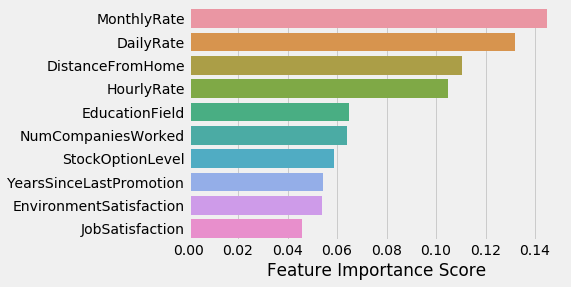

In [76]:
feature_imp = pd.Series(rfc.feature_importances_,index = X.columns).sort_values(ascending=False)
k = 10

sb.barplot(x=feature_imp[:10], y = feature_imp.index[:k])
#sb.set(rc={'figure.figsize' :(40,15)})
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.yticks(fontsize = 70)
plt.xticks(fontsize = 70)
plt.title("Feature importance in predicting Attrition")
plt.show()
plt.savefig("Feature-importance_attrition.jpg")

# Function to directly run ML algorithms

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [78]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.8392
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.844103    0.409091  0.839249     0.626597      0.775057
recall        0.992164    0.028754  0.839249     0.510459      0.839249
f1-score      0.912164    0.053731  0.839249     0.482948      0.775912
support    1659.000000  313.000000  0.839249  1972.000000   1972.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8300
CLASSIFICATION REPORT:
                  0.0   1.0  accuracy   macro avg  weighted avg
precision    0.838446   0.0   0.82996    0.419223      0.704362
recall       0.987952   0.0   0.82996    0.493976      0.829960
f1-score     0.907080   0.0   0.82996    0.453540      0.762020
support    415.000000  79.0   0.82996  494.000000    494.000000


C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Random Forest

In [80]:
rf_clf = RandomForestClassifier(n_estimators=50, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



TRAINIG RESULTS: 
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1659.0  313.0       1.0     1972.0        1972.0

 TESTING RESULTS: 
ACCURACY SCORE: 0.9575
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.956019   0.967742   0.95749    0.961880      0.957893
recall       0.995181   0.759494   0.95749    0.877337      0.957490
f1-score     0.975207   0.851064   0.95749    0.913135      0.955354
support    415.000000  79.000000   0.95749  494.000000    494.000000


# Support Vector Machine

In [81]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.8413
CLASSIFICATION REPORT:
                   0.0    1.0  accuracy    macro avg  weighted avg
precision     0.841278    0.0  0.841278     0.420639      0.707748
recall        1.000000    0.0  0.841278     0.500000      0.841278
f1-score      0.913798    0.0  0.841278     0.456899      0.768758
support    1659.000000  313.0  0.841278  1972.000000   1972.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8401
CLASSIFICATION REPORT:
                  0.0   1.0  accuracy   macro avg  weighted avg
precision    0.840081   0.0  0.840081    0.420040      0.705736
recall       1.000000   0.0  0.840081    0.500000      0.840081
f1-score     0.913091   0.0  0.840081    0.456546      0.767071
support    415.000000  79.0  0.840081  494.000000    494.000000


C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# XGBoost

In [82]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=5, min_child_weight=7,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None,
                           subsample=0.6)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9402
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.935557    0.980296  0.940162     0.957926      0.942658
recall        0.997589    0.635783  0.940162     0.816686      0.940162
f1-score      0.965578    0.771318  0.940162     0.868448      0.934744
support    1659.000000  313.000000  0.940162  1972.000000   1972.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.9130
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.913333   0.909091  0.912955    0.911212      0.912655
recall       0.990361   0.506329  0.912955    0.748345      0.912955
f1-score     0.950289   0.650407  0.912955    0.800348      0.902332
support    415.000000  79.000000  0.912955  494.000000    494.000000


# CatBoost

In [83]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9878
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.985740    1.000000   0.98783     0.992870      0.988003
recall        1.000000    0.923323   0.98783     0.961661      0.987830
f1-score      0.992819    0.960133   0.98783     0.976476      0.987631
support    1659.000000  313.000000   0.98783  1972.000000   1972.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.9393
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.938497   0.945455  0.939271    0.941976      0.939609
recall       0.992771   0.658228  0.939271    0.825499      0.939271
f1-score     0.964871   0.776119  0.939271    0.870495      0.934686
support    415.000000  79.000000  0.939271  494.000000    494.000000


# Adaboost

In [84]:
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(X_train, y_train)

evaluate(ad, X_train, X_test, y_train, y_test)

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



TRAINIG RESULTS: 
ACCURACY SCORE: 0.8702
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.881043    0.717557  0.870183     0.799300      0.855094
recall        0.977697    0.300319  0.870183     0.639008      0.870183
f1-score      0.926857    0.423423  0.870183     0.675140      0.846951
support    1659.000000  313.000000  0.870183  1972.000000   1972.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8502
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.866667   0.586207  0.850202    0.726437      0.821816
recall       0.971084   0.215190  0.850202    0.593137      0.850202
f1-score     0.915909   0.314815  0.850202    0.615362      0.819783
support    415.000000  79.000000  0.850202  494.000000    494.000000


# KNN

In [100]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)

evaluate(kn, X_train, X_test, y_train, y_test)

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



TRAINIG RESULTS: 
ACCURACY SCORE: 0.9097
CLASSIFICATION REPORT:
                   0.0         1.0  accuracy    macro avg  weighted avg
precision     0.920364    0.822430  0.909736     0.871397      0.904671
recall        0.977053    0.556962  0.909736     0.767008      0.909736
f1-score      0.947862    0.664151  0.909736     0.806006      0.902399
support    1656.000000  316.000000  0.909736  1972.000000   1972.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8684
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.889625   0.634146  0.868421    0.761886      0.850320
recall       0.964115   0.342105  0.868421    0.653110      0.868421
f1-score     0.925373   0.444444  0.868421    0.684909      0.851384
support    418.000000  76.000000  0.868421  494.000000    494.000000


# Decision Tree

In [86]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, y_train)

evaluate(dt, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1659.0  313.0       1.0     1972.0        1972.0

 TESTING RESULTS: 
ACCURACY SCORE: 0.9130
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.960396   0.700000  0.912955    0.830198      0.918754
recall       0.934940   0.797468  0.912955    0.866204      0.912955
f1-score     0.947497   0.745562  0.912955    0.846530      0.915204
support    415.000000  79.000000  0.912955  494.000000    494.000000


# Results

TypeError: 'str' object is not callable

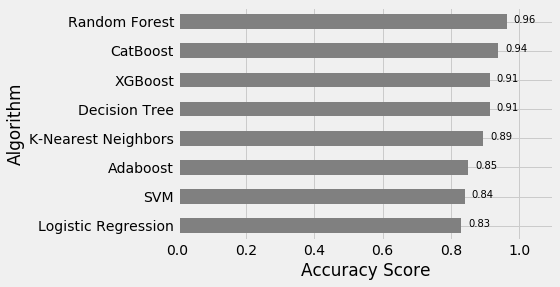

In [87]:
algo_lst =['K-Nearest Neighbors','Decision Tree','Logistic Regression','Random Forest','XGBoost','CatBoost','Adaboost','SVM']

accuracy_lst = [0.8947, 0.9130, 0.8300, 0.9636, 0.9130, 0.9393, 0.8502, 0.8401]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a horizontal bar chart
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title("Accuracy Score versus different ML algorithms")

plt.show()

TypeError: 'str' object is not callable

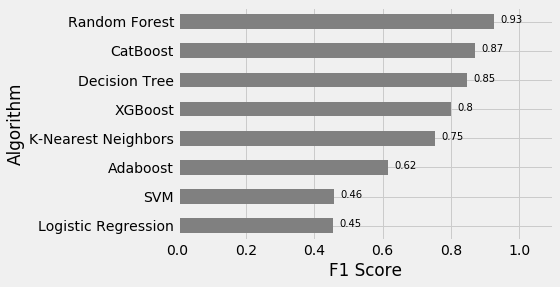

In [88]:
algo_lst =['K-Nearest Neighbors','Decision Tree','Logistic Regression','Random Forest','XGBoost','CatBoost','Adaboost','SVM']

accuracy_lst = [0.753379, 0.846530, 0.453540, 0.925101, 0.800348, 0.870495, 0.615362, 0.456546]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','f1-score']).sort_values(by=['f1-score'],ascending = True)

# Make a horizontal bar chart
ax=df_acc.plot.barh('Algorithm', 'f1-score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('F1 Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title("F1 Score versus different ML algorithms")

plt.show()

# --------------------------------------------------------------------------

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Hyperparameter Tuning using GridSearchCV

In [90]:
def tune_hyperparameters(model,X,Y):
    param_grid = {
      'n_estimators' : [10,50,250,1000],
      'learning_rate' : [0.001,0.01,0.1,1.0,10]
    }
    grid_search = GridSearchCV(model,param_grid=param_grid)
    grid_search.fit(X,Y)
    print("Best Params: ",grid_search.best_params_)
    return grid_search.best_params_


In [91]:
decision_tree_parameters = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}

In [92]:
best_parameters_raw = tune_hyperparameters(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters)),X_train,y_train)


C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Best Params:  {'learning_rate': 0.01, 'n_estimators': 1000}


# AdaBoostClassifier

In [93]:
def train_predict_evaluate(model,X_train,y_train,X_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Precision: ",precision_score(y_test,y_pred))
    print("Recall: ",recall_score(y_test,y_pred))
    print("F1 Score: ",f1_score(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy:  0.9534412955465587
Precision:  0.9818181818181818
Recall:  0.7105263157894737
F1 Score:  0.8244274809160306
Confusion Matrix:
 [[417   1]
 [ 22  54]]


TypeError: 'str' object is not callable

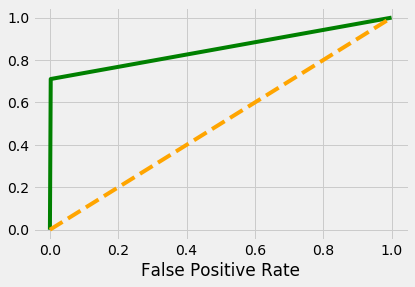

In [94]:
train_predict_evaluate(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X_train,y_train,X_test)


# K-Fold Cross Validation

In [95]:
def cross_validation(model,X,y):
    scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

    metrics = []
    metrics.append(np.mean(scores['test_accuracy']))
    metrics.append(np.mean(scores['test_precision']))
    metrics.append(np.mean(scores['test_recall']))
    metrics.append(np.mean(scores['test_f1']))

    print("Accuracy: ",metrics[0])
    print("Precision: ",metrics[1])
    print("Recall: ",metrics[2])
    print("F1 Score: ",metrics[3])

In [96]:
cross_validation(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X,Y)


C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Lenovo\Anaconda3\Anaconda 2020 version\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy:  0.9533912015176027
Precision:  0.984375
Recall:  0.7197013956507627
F1 Score:  0.8026917557069538
